In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Earthquake-priv/Data.xlsx


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
import warnings
warnings.filterwarnings('ignore')
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.utils as sku
import sklearn.linear_model as sklm
import sklearn.neighbors as skn
import sklearn.ensemble as ske
import catboost as cb
import scipy.stats as sstats
import random
seed = 12
np.random.seed(seed)

from datetime import date

import pandas_profiling as pp

In [148]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
%matplotlib inline



print(tf.__version__)

# Make NumPy printouts easier to read.


2.6.4


In [149]:
# !pip install tensorflow-addons

In [150]:
dataset = pd.read_excel("/kaggle/input/Earthquake-priv/Data.xlsx")

In [151]:
dataset.head()

,PGA,PGV,Ia,CAR,Ky,P_Disp
0,0.04,0.03,0.02,0.46,0.02,0.15
1,0.04,0.03,0.02,0.52,0.02,0.24
2,0.13,0.07,0.10,0.15,0.02,3.33
3,0.10,0.05,0.07,0.21,0.02,1.88
4,0.06,0.04,0.04,0.32,0.02,0.90


In [152]:
# profile = pp.ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)
# profile.to_file("profile.html")

In [153]:
# dataset.isna().sum()

In [154]:
# dataset.describe()

In [155]:
dataset = dataset.drop(dataset[(dataset.P_Disp > 150) | (dataset.P_Disp < 0.015)].index)
dataset.head()

,PGA,PGV,Ia,CAR,Ky,P_Disp
0,0.04,0.03,0.02,0.46,0.02,0.15
1,0.04,0.03,0.02,0.52,0.02,0.24
2,0.13,0.07,0.10,0.15,0.02,3.33
3,0.10,0.05,0.07,0.21,0.02,1.88
4,0.06,0.04,0.04,0.32,0.02,0.90


In [156]:
# sns.pairplot(dataset[['PGA', 'PGV', 'Ia', 'CAR','Ky','P_Disp' ]], diag_kind='kde')

In [157]:
dataset = np.log(dataset)
dataset.head()

,PGA,PGV,Ia,CAR,Ky,P_Disp
0,-3.13,-3.66,-4.17,-0.78,-3.91,-1.87
1,-3.27,-3.45,-3.88,-0.65,-3.91,-1.41
2,-2.01,-2.63,-2.29,-1.90,-3.91,1.20
3,-2.34,-2.91,-2.59,-1.57,-3.91,0.63
4,-2.78,-3.31,-3.27,-1.13,-3.91,-0.11


In [158]:
# profile = pp.ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)
# profile.to_file("profile.html")

In [159]:
# np.exp(-3.13)

In [160]:
# sns.histplot(dataset.PGA)

In [161]:
# sns.histplot(dataset.PGV)

In [162]:
# sns.histplot(dataset.Ia)

In [163]:
# sns.histplot(dataset.CAR)

In [164]:
# sns.histplot(dataset.Ky)

In [165]:
# sns.histplot(dataset.P_Disp)

In [166]:
# dataset.describe()

In [167]:
# sns_plot = sns.pairplot(dataset[['PGA', 'PGV', 'Ia', 'CAR','Ky','P_Disp' ]], diag_kind='kde')
# sns_plot.figure.savefig("output.png")


In [168]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline

# class MultiColumnLabelEncoder:
#     def __init__(self,columns = None):
#         self.columns = columns # array of column names to encode

#     def fit(self,X,y=None):
#         return self # not relevant here

#     def transform(self,X):
#         '''
#         Transforms columns of X specified in self.columns using
#         LabelEncoder(). If no columns specified, transforms all
#         columns in X.
#         '''
#         output = X.copy()
#         if self.columns is not None:
#             for col in self.columns:
#                 output[col] = LabelEncoder().fit_transform(output[col])
#         else:
#             for colname,col in output.iteritems():
#                 output[colname] = LabelEncoder().fit_transform(col)
#         return output

#     def fit_transform(self,X,y=None):
#         return self.fit(X,y).transform(X)

In [169]:
# dataset=MultiColumnLabelEncoder(columns = ['Ky']).fit_transform(dataset)
# dataset.head()

In [170]:
# dataset.describe()

In [171]:
# from sklearn.model_selection import train_test_split

# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1]
 
# # split the dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)


In [172]:
# train_features = X_train
# test_features = X_test

# train_labels = y_train
# test_labels = y_test

In [173]:
# train_features.head()

In [174]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(train_features))
# print(normalizer.mean.numpy())

In [175]:
# input_data  = np.array([[4 , 5 , 6 , 7, 8]])
# normalizer(input_data)

In [176]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['Std_err'], label='Std_err')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [P_Disp]')
  plt.legend()
  plt.grid(True)

In [177]:
from keras import backend as k
# def matthews_correlation(y_true, y_pred):
#     y_pred_pos = K.round(K.clip(y_pred, 0, 1))
#     y_pred_neg = 1 - y_pred_pos

#     y_pos = K.round(K.clip(y_true, 0, 1))
#     y_neg = 1 - y_pos

#     tp = K.sum(y_pos * y_pred_pos)
#     tn = K.sum(y_neg * y_pred_neg)

#     fp = K.sum(y_neg * y_pred_pos)
#     fn = K.sum(y_pos * y_pred_neg)

#     numerator = (tp * tn - fp * fn)
#     denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

#     return numerator / (denominator + K.epsilon())

def Std_err(y_true, y_pred):
    err  = y_pred - y_true
    mean_err = k.mean(err)
    d = err - mean_err
    ans = k.sqrt(k.mean(k.sum(k.square(d))))
    return ans


                
    


In [178]:
def Corr_R(y_true, y_pred):
    y_true_mean = k.mean(y_true)
    y_pred_mean = k.mean(y_pred)
    num = k.sum((y_true-y_true_mean)*(y_pred-y_pred_mean))
    den = k.sqrt((k.sum(k.square(y_true-y_true_mean)))*(k.sum(k.square(y_pred-y_pred_mean))))
    return num/den

In [179]:
def build_and_compile_model(n):
  model = keras.Sequential([
#       norm,
      layers.Dense(8, input_shape=(n,), activation='sigmoid'),
      layers.Dense(8, activation='relu'),
#       layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics = ['MeanAbsoluteError',Std_err,Corr_R])
  return model

In [180]:
# dnn_model = build_and_compile_model(5)
# dnn_model.summary()

In [181]:
# %%time
# history = dnn_model.fit(
#     X_train,
#     y_train,
#     validation_split=0.1,
#     verbose=1, epochs=50)

In [182]:
# plot_loss(history)

In [183]:
# test_results =[]
# test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [184]:
# predictions = dnn_model.predict(X_test)
# predictions

In [185]:
# sub = pd.DataFrame()
# # sub['Actual'] = y
# sub['Actual'] = pd.DataFrame()
# sub.to_csv('y_test.csv',index=False)

In [186]:
# sub = pd.DataFrame()
# # sub['Actual'] = y
# sub['pred2'] = pd.DataFrame(predictions)
# sub.to_csv('mysubmission4.csv',index=False)

In [ ]:
# input_data = np.log(np.array([[0.0621619,0.036424837,0.038161434,0.321740487,0.02]]))
# print(input_data)
# # input  = normalizer(input_data)
# # print(input)
# t = np.exp(dnn_model.predict(input_data))
# t

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
263/263 [==============================] - 1s 4ms/step - loss: 1.6617 - mean_absolute_error: 1.6617 - Std_err: 11.0392 - Corr_R: 0.5373 - val_loss: 1.5417 - val_mean_absolute_error: 1.5417 - val_Std_err: 10.2482 - val_Corr_R: 0.5748
Epoch 2/50
263/263 [==============================] - 1s 3ms/step - loss: 1.5423 - mean_absolute_error: 1.5423 - Std_err: 10.4007 - Corr_R: 0.

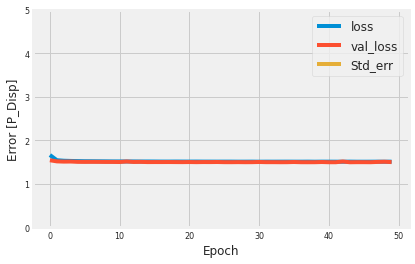

In [188]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


PGA, PGV, Ia

----------------------------------------------------------------------------------------------------------------------------------------________________________________________________________________________________________________________________________________________

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


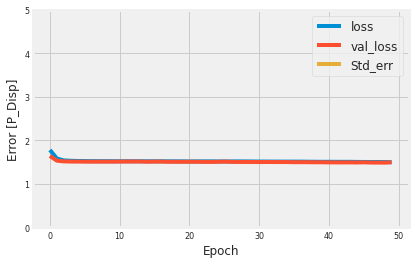

In [189]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
263/263 [==============================] - 1s 3ms/step - loss: 1.8464 - mean_absolute_error: 1.8464 - Std_err: 11.8767 - Corr_R: 0.6481 - val_loss: 1.6849 - val_mean_absolute_error: 1.6849 - val_Std_err: 11.0252 - val_Corr_R: 0.8228
Epoch 2/50
263/263 [==============================] - 1s 3ms/step - loss: 1.3681 - mean_absolute_error: 1.3681 - Std_err: 9.0895 - Corr_R: 0.8

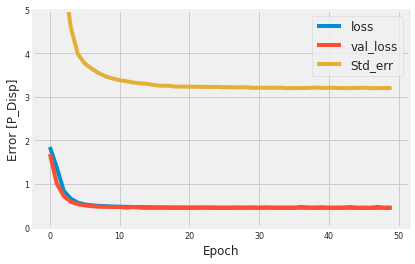

In [83]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


In [ ]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
263/263 [==============================] - 1s 4ms/step - loss: 1.7742 - mean_absolute_error: 1.7742 - Std_err: 11.6485 - Corr_R: 0.8852 - val_loss: 1.6304 - val_mean_absolute_error: 1.6304 - val_Std_err: 10.6811 - val_Corr_R: 0.9120
Epoch 2/50
263/263 [==============================] - 1s 3ms/step - loss: 1.3678 - mean_absolute_error: 1.3678 - Std_err: 9.0629 - Corr_R: 0.8

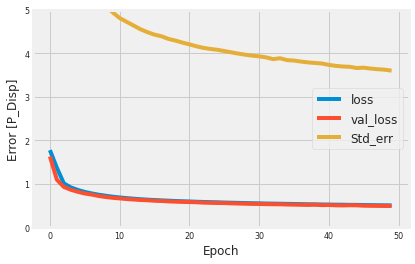

In [84]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


In [67]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


,PGA,PGV,Ia,CAR,Ky,P_Disp
0,-3.13,-3.66,-4.17,-0.78,-3.91,-1.87
1,-3.27,-3.45,-3.88,-0.65,-3.91,-1.41
2,-2.01,-2.63,-2.29,-1.90,-3.91,1.20
3,-2.34,-2.91,-2.59,-1.57,-3.91,0.63
4,-2.78,-3.31,-3.27,-1.13,-3.91,-0.11


In [68]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


,PGA,PGV,Ky
11124,-1.38,-0.72,-1.90
9323,-2.02,-1.62,-2.59
7337,-2.31,-2.82,-3.00
1802,-2.25,-2.51,-3.91
7883,-2.35,-3.10,-2.59


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
263/263 [==============================] - 1s 3ms/step - loss: 1.6420 - mean_absolute_error: 1.6420 - Std_err: 10.7296 - Corr_R: 0.6335 - val_loss: 1.3232 - val_mean_absolute_error: 1.3232 - val_Std_err: 8.9063 - val_Corr_R: 0.7478
Epoch 2/25
263/263 [==============================] - 1s 3ms/step - loss: 1.1063 - mean_absolute_error: 1.1063 - Std_err: 7.6568 - Corr_R: 0.79

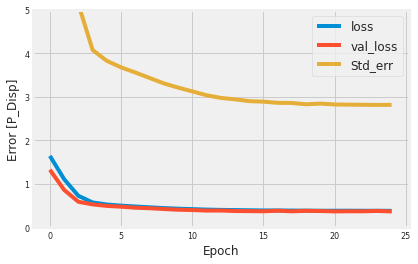

In [69]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
263/263 [==============================] - 1s 4ms/step - loss: 1.8108 - mean_absolute_error: 1.8108 - Std_err: 11.9370 - Corr_R: 0.2818 - val_loss: 1.5962 - val_mean_absolute_error: 1.5962 - val_Std_err: 10.5493 - val_Corr_R: 0.7477
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 1.3154 - mean_absolute_error: 1.3154 - Std_err: 8.8959 - Corr_R: 0.

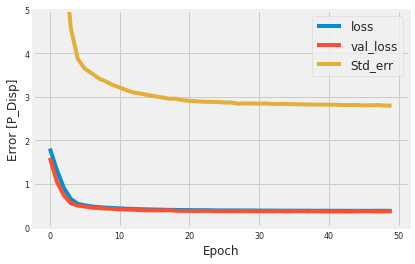

In [87]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


In [ ]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


In [ ]:
from sklearn.model_selection import train_test_split

Input  = ['PGA','PGV','Ia']    #change the params
X = dataset[Input]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

dnn_model = build_and_compile_model(3)   #change the number of params
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=50)

plot_loss(history)

predictions = dnn_model.predict(X)
sub = pd.DataFrame()
# sub['Actual'] = y

sub['Pred'] = pd.DataFrame(predictions)
sub.to_csv('PGA_PGV_Ia.csv',index=False)     #change the name of spreadsheet to identify each combination


In [71]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

train_features = X_train
test_features = X_test

train_labels = y_train
test_labels = y_test

In [72]:
import os
import time
import re

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor


############################################################################################################################

In [73]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2', 'explained_variance']
scores = cross_validate(random_forest, train_features, train_labels, scoring=scoring, cv=5)

sorted(scores.keys())

rf_fit_time = scores['fit_time'].mean()
rf_score_time = scores['score_time'].mean()
rf_test_neg_mean_squared_error = scores['test_neg_mean_squared_error'].mean()
rf_test_neg_mean_absolute_error = scores['test_neg_mean_absolute_error'].mean()
rf_test_r2 = scores['test_r2'].mean()
rf_test_explained_variance= scores['test_explained_variance'].mean()


print("rf_fit_time :",rf_fit_time)
print("rf_test_neg_mean_squared_error :",rf_test_neg_mean_squared_error)
print("rf_test_neg_mean_absolute_error :",rf_test_neg_mean_absolute_error)
print("rf_test_r2 :",rf_test_r2)
print("rf_test_explained_variance :",rf_test_explained_variance)

rf_fit_time : 2.2417967319488525
rf_test_neg_mean_squared_error : -0.2884254988552757
rf_test_neg_mean_absolute_error : -0.39593769296213893
rf_test_r2 : 0.9431289559393162
rf_test_explained_variance : 0.9431954738177997


In [89]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2', 'explained_variance']
scores = cross_validate(xgb, train_features, train_labels, scoring=scoring, cv=5)

sorted(scores.keys())

xgb_fit_time = scores['fit_time'].mean()
xgb_score_time = scores['score_time'].mean()
xgb_test_neg_mean_squared_error = scores['test_neg_mean_squared_error'].mean()
xgb_test_neg_mean_absolute_error = scores['test_neg_mean_absolute_error'].mean()
xgb_test_r2 = scores['test_r2'].mean()
xgb_test_explained_variance= scores['test_explained_variance'].mean()


print("xgb_fit_time :",xgb_fit_time)
print("xgb_test_neg_mean_squared_error :",xgb_test_neg_mean_squared_error)
print("xgb_test_neg_mean_absolute_error :",xgb_test_neg_mean_absolute_error)
print("xgb_test_r2 :",xgb_test_r2)
print("xgb_test_explained_variance :",xgb_test_explained_variance)

xgb_fit_time : 1.0876280784606933
xgb_test_neg_mean_squared_error : -0.2348919765561864
xgb_test_neg_mean_absolute_error : -0.3570168100918197
xgb_test_r2 : 0.9536827254012715
xgb_test_explained_variance : 0.9537322402011611


In [74]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(train_features, train_labels)

RandomForestRegressor()

In [75]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error').fit(X_train, y_train)
y_pred = est.predict(X_test)
mean_squared_error(y_test, y_pred)
# print("Y_test :",y_test)


0.49589966642597283

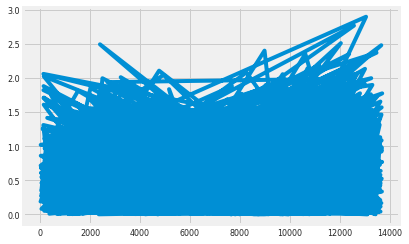

In [76]:
import matplotlib.pyplot as plt

err  = abs(y_pred - y_test)


plt.plot(err)
plt.show()

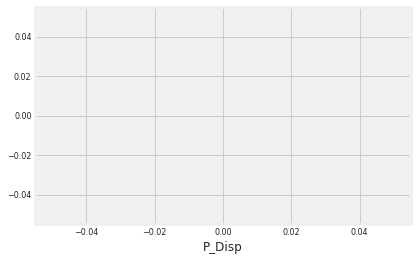

In [77]:
sns.lineplot(err)
plt.show()